In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramesh1996","key":"a42b46f93bb08659625beb2ab959f4ae"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets list -s Animal

ref                                                           title                                              size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jessicali9530/animal-crossing-new-horizons-nookplaza-dataset  Animal Crossing New Horizons Catalog             590770  2021-06-08 15:05:09.513000          75088      51685  0.88235295       
andrewmvd/animal-faces                                        Animal Faces                                  729700755  2020-05-22 06:49:01.397000          27997        294  0.875            
uciml/zoo-animal-classification                               Zoo Animal Classification                          1898  2016-12-24 18:05:10.877000          46656        441  0.8235294        
rtatman/animal-bites                         

In [4]:
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)


In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
!ls

animal-faces.zip  sample_data


In [7]:
# 1. Unzip the file
!unzip animal-faces.zip -d animal

# 2. Import libraries
import os
import shutil
from glob import glob
from PIL import Image

# 3. Define source and destination folders
src_train_dirs = [
    "/content/animal/afhq/train/cat/*",
    "/content/animal/afhq/train/dog/*",
    "/content/animal/afhq/train/wild/*",
]
src_val_dirs = [
    "/content/animal/afhq/val/cat/*",
    "/content/animal/afhq/val/dog/*",
    "/content/animal/afhq/val/wild/*",
]

# Create destination folders
dst_train = "/content/animal/images/train"
dst_test = "/content/animal/images/test"
os.makedirs(dst_train, exist_ok=True)
os.makedirs(dst_test, exist_ok=True)

Streaming output truncated to the last 5000 lines.
  inflating: animal/afhq/train/wild/flickr_wild_001378.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001379.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001380.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001381.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001382.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001384.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001385.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001386.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001387.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001388.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001389.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001390.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001391.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001392.jpg  
  inflating: animal/afhq/train/wild/flickr_wild_001393.jpg  
  inflating: animal/afhq/train/wil

In [8]:
# Helper function to copy images without resizing
def copy_images(src_paths, dst_folder):
    for path in src_paths:
        for img_path in glob(path):
            try:
                fname = os.path.basename(img_path)
                dst_path = os.path.join(dst_folder, fname)
                shutil.copy(img_path, dst_path)
            except Exception as e:
                print(f"Failed to copy {img_path}: {e}")

# Copy train and val images
copy_images(src_train_dirs, dst_train)
copy_images(src_val_dirs, dst_test)

In [9]:
!rm -r /content/animal/afhq

In [10]:
train_path = '/content/animal/images/train'
test_path = '/content/animal/images/test'

In [11]:
train_count = len(os.listdir(train_path))
test_count = len(os.listdir(test_path))

print(f"Number of training images: {train_count}")
print(f"Number of testing images: {test_count}")


Number of training images: 14630
Number of testing images: 1500


In [12]:
image_files = os.listdir(train_path)
image_files[:5]

['pixabay_wild_001000.jpg',
 'pixabay_cat_001830.jpg',
 'flickr_dog_000460.jpg',
 'pixabay_dog_002605.jpg',
 'flickr_dog_000979.jpg']

In [13]:
img_path = os.path.join(train_path, image_files[1])
img_path

'/content/animal/images/train/pixabay_cat_001830.jpg'

In [14]:
train_path

'/content/animal/images/train'

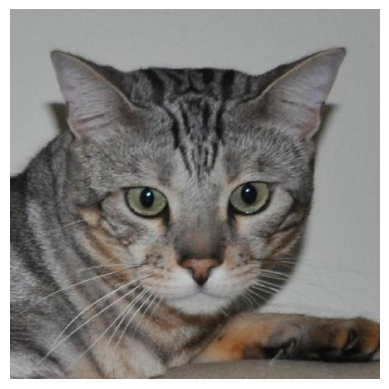

In [15]:
# Make sure you use the full path to the image
img_path = os.path.join(train_path, image_files[1])
img = Image.open(img_path)

# Show the image
plt.imshow(img)
plt.axis("off")  # optional, hides axis
plt.show()

Random image path: pixabay_cat_003049.jpg
Image height: 512
Image width: 512


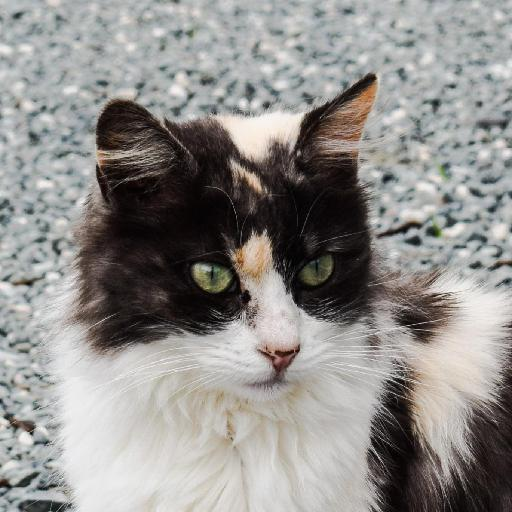

In [16]:
import random
from PIL import Image

# Set seed
random.seed(50) # <- try changing this and see what happens

# 2. Get random image path

random_image_path = random.choice(image_files)
img_path = os.path.join(train_path,   random_image_path)


# 4. Open image
img = Image.open(img_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

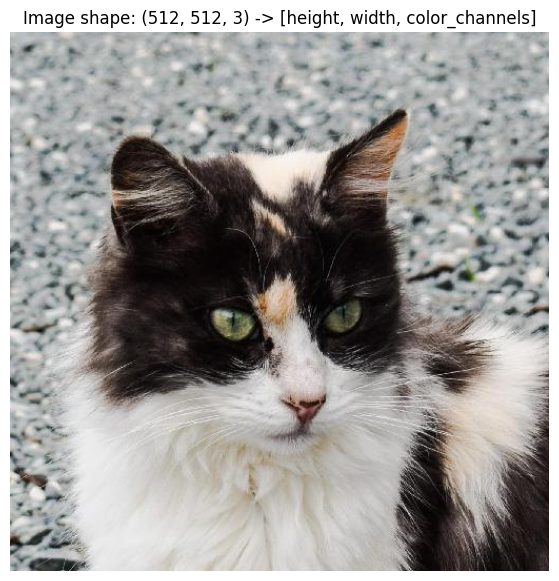

In [17]:
import numpy as np

img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

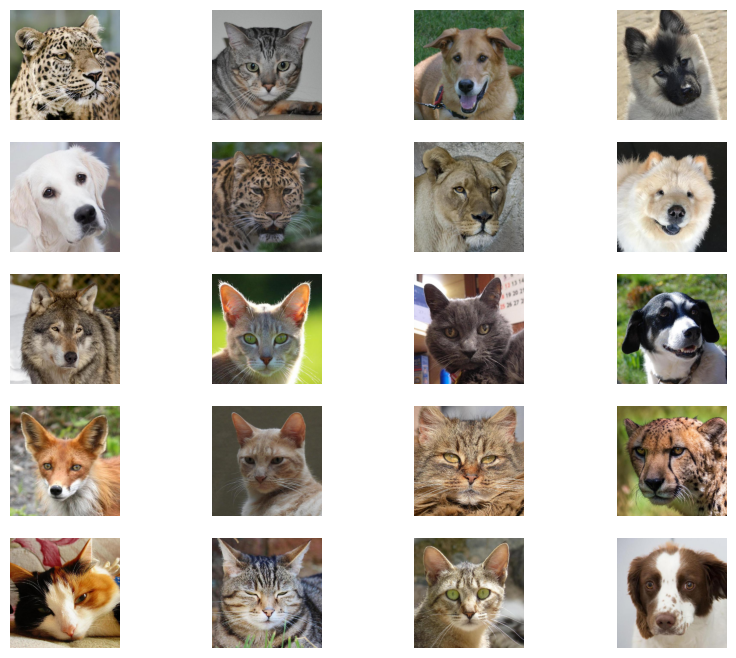

In [18]:
import torch
import torchvision
import matplotlib.pyplot as plt

def show_images(datset, num_samples=20, cols=4):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(10,10))
    for i, img in enumerate(image_files):
        if i == num_samples:
            break
        plt.subplot(int(num_samples/cols) + 1, cols, i + 1)
        img_path = os.path.join(train_path, img)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')


show_images(image_files)

In [19]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

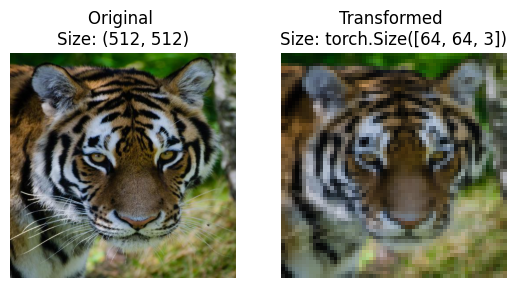

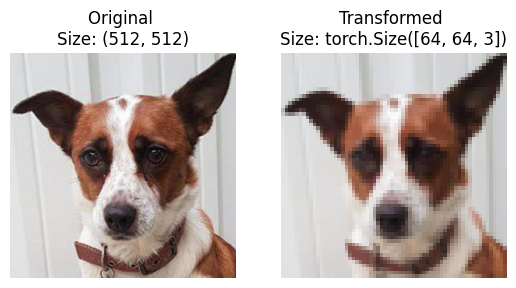

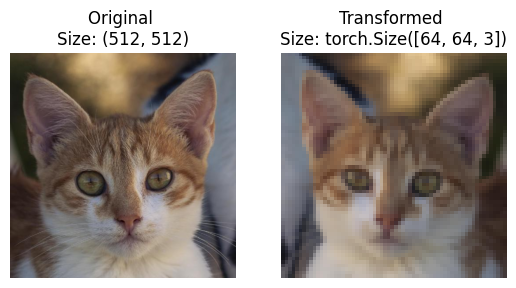

In [20]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_path = random.sample(image_paths, k=n)

    for image_path in random_image_path:

      random_image_paths = os.path.join(train_path, image_path)

      with Image.open(random_image_paths) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            #fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_files,
                        transform=data_transform,
                        n=3)

In [21]:
import torch.nn.functional as F

def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return torch.linspace(start, end, timesteps)

def get_index_from_list(vals, t, x_shape):
    """
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    batch_size = t.shape[0]
    out = vals.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

def forward_diffusion_sample(x_0, t, device="cpu"):
    """
    Takes an image and a timestep as input and
    returns the noisy version of it
    """
    noise = torch.randn_like(x_0)
    sqrt_alphas_cumprod_t = get_index_from_list(sqrt_alphas_cumprod, t, x_0.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x_0.shape
    )
    # mean + variance
    return sqrt_alphas_cumprod_t.to(device) * x_0.to(device) \
    + sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device), noise.to(device)


# Define beta schedule
T = 300
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

In [22]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch

IMG_SIZE = 64
BATCH_SIZE = 64

# Step 1: Create a custom Dataset class for your images
class CustomImageDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_paths = [
            os.path.join(folder_path, f)
            for f in os.listdir(folder_path)
            if f.endswith('.jpg')  # Only .jpg files
        ]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Ensure RGB format
        if self.transform:
            image = self.transform(image)
        return image  # No labels needed for diffusion models

# Step 2: Update the data loading function
def load_transformed_dataset(train_folder):
    data_transforms = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),  # Optional augmentation
        transforms.ToTensor(),  # Scales to [0, 1]
        transforms.Lambda(lambda t: (t * 2) - 1)  # Scales to [-1, 1]
    ])

    # Load your custom datasets
    train = CustomImageDataset(train_folder, transform=data_transforms)

    return train

# Step 3: Load your data (replace paths with your actual folders)
train_folder = "/content/animal/images/train"  # e.g., "/content/train"

data = load_transformed_dataset(train_folder)

dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

# Step 4: Verify (optional)
batch = next(iter(dataloader))
print("Batch shape:", batch.shape)  # Should be [128, 3, 64, 64]
#show_tensor_image(batch[0])  # Display first image

Batch shape: torch.Size([64, 3, 64, 64])


In [23]:
data.__len__()

14630

In [24]:
data[0].shape

torch.Size([3, 64, 64])

In [25]:
len(dataloader)

228

In [26]:
dataloader.batch_size

64

In [27]:
def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :]
    plt.imshow(reverse_transforms(image))

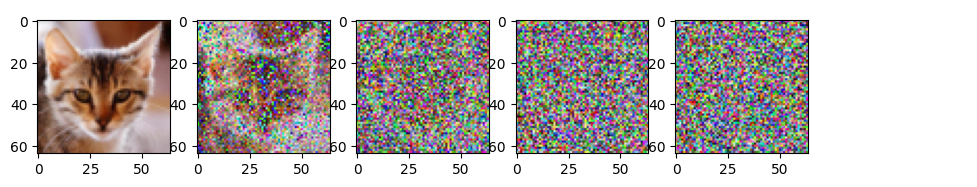

In [28]:
# Simulate forward diffusion
image = next(iter(dataloader))[0]

plt.figure(figsize=(12,2))
plt.axis('off')
num_images = 5
stepsize = int(T/num_images)

for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(image, t)
    show_tensor_image(img)

In [29]:
from torch import nn
import math


class Block(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp =  nn.Linear(time_emb_dim, out_ch)
        if up:
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()

    def forward(self, x, t, ):
        # First Conv
        h = self.bnorm1(self.relu(self.conv1(x)))
        # Time embedding
        time_emb = self.relu(self.time_mlp(t))
        # Extend last 2 dimensions
        time_emb = time_emb[(..., ) + (None, ) * 2]
        # Add time channel
        h = h + time_emb
        # Second Conv
        h = self.bnorm2(self.relu(self.conv2(h)))
        # Down or Upsample
        return self.transform(h)


class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # TODO: Double check the ordering here
        return embeddings


class SimpleUnet(nn.Module):
    """
    A simplified variant of the Unet architecture.
    """
    def __init__(self):
        super().__init__()
        image_channels = 3
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 3
        time_emb_dim = 32

        # Time embedding
        self.time_mlp = nn.Sequential(
                SinusoidalPositionEmbeddings(time_emb_dim),
                nn.Linear(time_emb_dim, time_emb_dim),
                nn.ReLU()
            )

        # Initial projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample
        self.downs = nn.ModuleList([Block(down_channels[i], down_channels[i+1], \
                                    time_emb_dim) \
                    for i in range(len(down_channels)-1)])
        # Upsample
        self.ups = nn.ModuleList([Block(up_channels[i], up_channels[i+1], \
                                        time_emb_dim, up=True) \
                    for i in range(len(up_channels)-1)])

        # Edit: Corrected a bug found by Jakub C (see YouTube comment)
        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embedd time
        t = self.time_mlp(timestep)
        # Initial conv
        x = self.conv0(x)
        # Unet
        residual_inputs = []
        for down in self.downs:
            x = down(x, t)
            residual_inputs.append(x)
        for up in self.ups:
            residual_x = residual_inputs.pop()
            # Add residual x as additional channels
            x = torch.cat((x, residual_x), dim=1)
            x = up(x, t)
        return self.output(x)

model = SimpleUnet()
print("Num params: ", sum(p.numel() for p in model.parameters()))
model

Num params:  62438883


SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

In [30]:
@torch.no_grad()
def sample_timestep(x, t):
    """
    Calls the model to predict the noise in the image and returns
    the denoised image.
    Applies noise to this image, if we are not in the last step yet.
    """
    betas_t = get_index_from_list(betas, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x.shape
    )
    sqrt_recip_alphas_t = get_index_from_list(sqrt_recip_alphas, t, x.shape)

    # Call model (current image - noise prediction)
    model_mean = sqrt_recip_alphas_t * (
        x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t
    )
    posterior_variance_t = get_index_from_list(posterior_variance, t, x.shape)

    if t == 0:
        # As pointed out by Luis Pereira (see YouTube comment)
        # The t's are offset from the t's in the paper
        return model_mean
    else:
        noise = torch.randn_like(x)
        return model_mean + torch.sqrt(posterior_variance_t) * noise

@torch.no_grad()
def sample_plot_image():
    # Sample noise
    img_size = IMG_SIZE
    img = torch.randn((1, 3, img_size, img_size), device=device)
    plt.figure(figsize=(12,2))
    plt.axis('off')
    num_images = 10
    stepsize = int(T/num_images)

    for i in range(0,T)[::-1]:
        t = torch.full((1,), i, device=device, dtype=torch.long)
        img = sample_timestep(img, t)
        # Edit: This is to maintain the natural range of the distribution
        img = torch.clamp(img, -1.0, 1.0)
        if i % stepsize == 0:
            plt.subplot(1, num_images, int(i/stepsize)+1)
            show_tensor_image(img.detach().cpu())
    plt.show()

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [32]:
def get_loss(model, x_0, t):
  # Repeat the single image for the whole batch
  #x_0 = x_0.repeat(128, 1, 1, 1)  # [128, 3, 64, 64]
  x_noisy, noise = forward_diffusion_sample(x_0, t, device)
  noise_pred = model(x_noisy, t)
  return F.l1_loss(noise, noise_pred)

In [33]:
sample_image = batch
sample_image.shape

torch.Size([64, 3, 64, 64])

Epoch 0 | step 000 Loss: 0.8120824098587036 


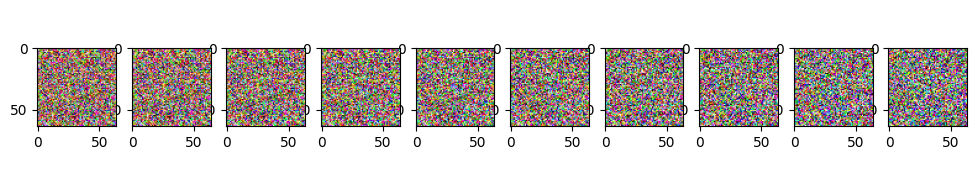

Epoch 5 | step 000 Loss: 0.17620965838432312 


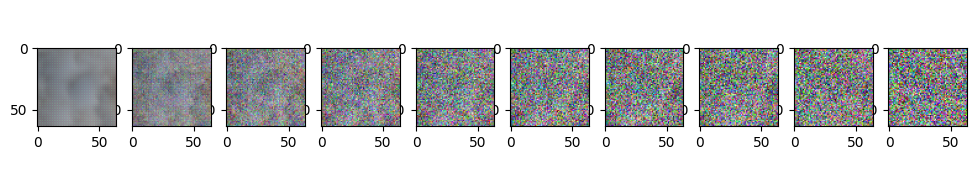

Epoch 10 | step 000 Loss: 0.16606405377388 


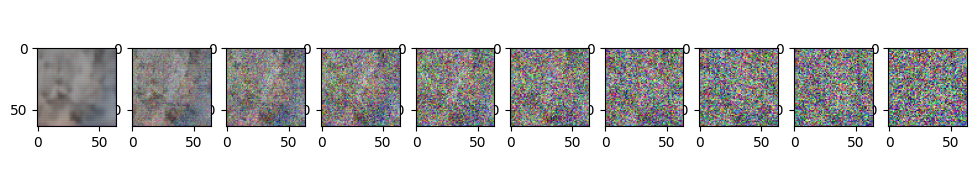

Epoch 15 | step 000 Loss: 0.14132367074489594 


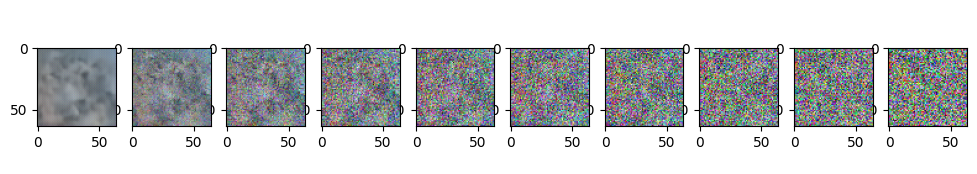

Epoch 20 | step 000 Loss: 0.16205577552318573 


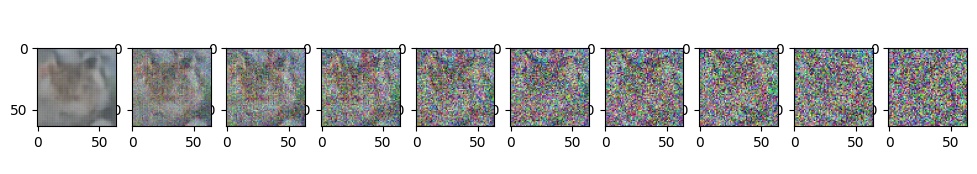

Epoch 25 | step 000 Loss: 0.12574402987957 


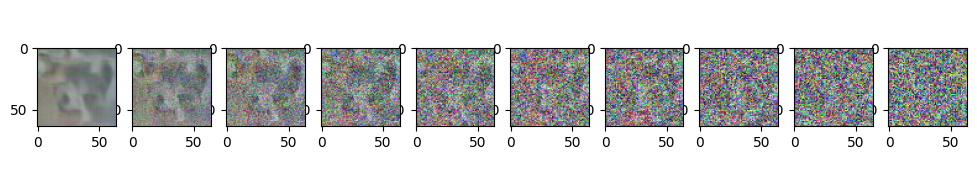

Epoch 30 | step 000 Loss: 0.1429305374622345 


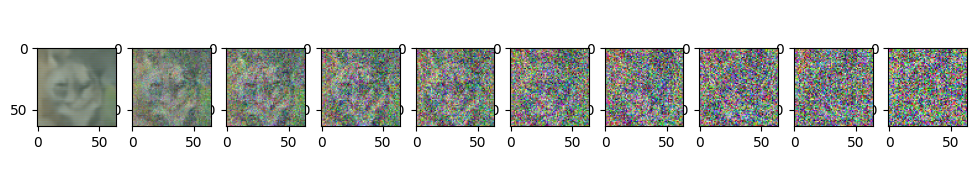

Epoch 35 | step 000 Loss: 0.1582326889038086 


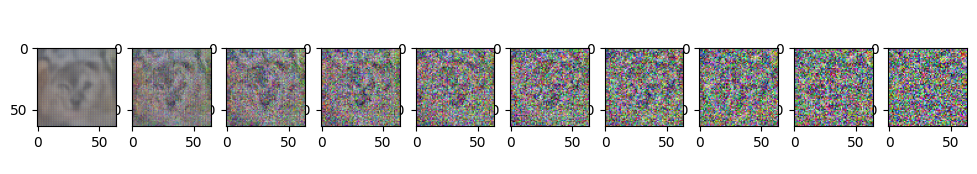

Epoch 40 | step 000 Loss: 0.1552235335111618 


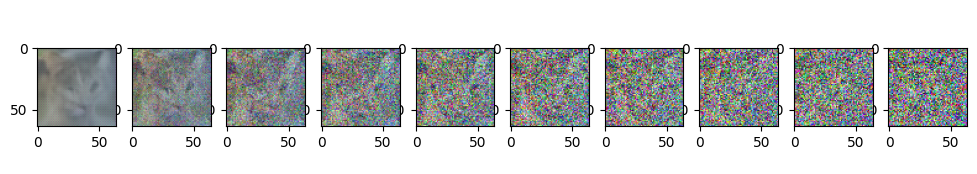

Epoch 45 | step 000 Loss: 0.1529422253370285 


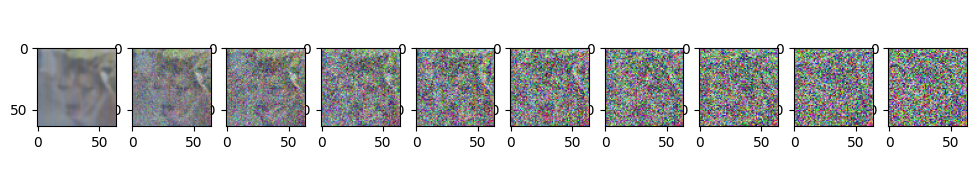

Total training time: 5279.004 seconds


In [34]:
from torch.optim import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 50

# Start the timer
from timeit import default_timer as timer
start_time = timer()

for epoch in range(epochs):
    for step, batch in enumerate(dataloader):
      optimizer.zero_grad()

      t = torch.randint(0, T, (BATCH_SIZE,), device=device).long()
      loss = get_loss(model, batch, t)
      loss.backward()
      optimizer.step()

      if epoch % 5 == 0 and step == 0:
        print(f"Epoch {epoch} | step {step:03d} Loss: {loss.item()} ")
        sample_plot_image()

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

In [35]:
torch.save(model.state_dict(), "unet_50_epochs.pth")
torch.save(optimizer.state_dict(), "optimizer_50_epochs.pth")
